<a href="https://colab.research.google.com/github/sera0911/asia-ai-study/blob/main/python_day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

day6 정리

module - 파이썬에서 프로그램 설계, 실행 단위 (파일명.py로 저장, 파일명이 모듈명이 됨)   
import 모듈명    
모듈명.함수   
import 모듈명 as 별칭   
멸칭.함수

package - 연관성이 있는 module을 그룹핑(물리적으로 디렉토리로 생성됨)   

form 상위package.하위package import 모듈명 as 별칭    
별칭.함수    
별칭.클래스()   

from package.모듈명 import 클래스    
a = 클래스()   

from package.모듈명 import 함수 


내장함수 open('파일경로이름', 'w | r | wb | a | rb') : FilOWrapper 객체반환    
FilOWrapper 객체.read()   
FilOWrapper 객체.readlines()    
FilOWrapper 객체.readline()     
반드시 FilOWrapper 객체.close() 해야 한다.    


이구문을 대신 자동으로 close 해주는 구문이 있다   
with open('파일경로이름', 'w | r | wb | a | rb') as 객체명 :    
with ~ as 블럭은 블럭문을 빠져나가면 인터프리터가 파일을 close해준다

실행중에 현재 메모리에 저장된 객체를 파일로 저장하려면 pickle 모듈.dump(), pickle모듈.load()    


datetime.date(), now()   
time.time()    
형식문자
random.random(), randrange(), shuffle(), choice(), sample()   
re    
정규 표현식에 사용되는 패턴문자 match(). serch(),find~, sub()   


base 또는 basic 가상환경 활성화 후에    
Anaconda Prompt> conda install pandas   



In [5]:
import pandas as pd

print(pd.__version__)

1.1.5


In [6]:
import pandas as pd
csv_test = pd.read_csv('test_csv_file.csv')
# DataFrame.shape 을 사용해서 행(row)과 열(column)의 개수 확인
csv_test.shape # number of rows, columns
# 데이터 확인
print(csv_test )

   ID LAST_NAME  AGE
0   1       KIM   30
1   2      CHOI   25
2   3       LEE   41
3   4      PARK   19
4   5       LIM   36


In [2]:
import pandas as pd

print(pd.__version__)

text_test = pd.read_csv('test_text_filee.txt', sep='|')
print(type(text_test))
print(text_test.shape)
print(text_test)


1.1.5
<class 'pandas.core.frame.DataFrame'>
(3, 5)
   ID    A  B  C    D
0  C1  1.0  2  3  NaN
1  C2  5.0  ?  7  8.0
2  C3  NaN  3  5  7.0


pandas library의 read_csv()     
파일 불러올 때 index 지정해주기 : index_col
첫번째 열인 'ID'라는 이름의 변수를 Index 로 지정해주고 싶으면 index_col=0 (위치)이나
index_col='ID' 처럼 직접 변수 이름을 지정

In [3]:
text_test = pd.read_csv('test_text_filee.txt', sep='|', index_col = 0)
print(text_test)

      A  B  C    D
ID                
C1  1.0  2  3  NaN
C2  5.0  ?  7  8.0
C3  NaN  3  5  7.0


변수 이름(column name, header) 이 없는 파일 로드할 때 이름 부여 : names=['X1', 'X2', ... ]
header=None 은 칼럼 이름이 없다의 의미    
1번째 행이 칼럼 이름이라면 header=0 으로 지정

특정 줄은 제외하고 파일 내용 로드 : skiprows = [x, x]

In [4]:
text_test = pd.read_csv('test_without_column_name.txt', sep='|', names = ['ID', 'A', 'B', 'C', 'D'], header = None, index_col = 'ID')
print(text_test)

      A  B  C    D
ID                
ID    A  B  C    D
C1    1  2  3  NaN
C2    5  ?  7    8
C3  NaN  3  5    7


In [7]:
text_test = pd.read_csv("test_csv_file.csv", skiprows = [1, 2] )
print(text_test)

   ID LAST_NAME  AGE
0   3       LEE   41
1   4      PARK   19
2   5       LIM   36


pandas library의 read_csv()   
n 개의 행 데이터만 로드 : nrows = n

In [8]:
csv_test = pd.read_csv("test_csv_file.csv", nrows = 3 )
print(csv_test )

   ID LAST_NAME  AGE
0   1       KIM   30
1   2      CHOI   25
2   3       LEE   41


사용자 정의 결측값 기호를 pandas가 결측값으로 인식할 수 있도록 설정하는 옵션 na_values    
값이 없이 빈 형태로 읽어오는지 확인할 수 있는 코드

In [13]:
text_test = pd.read_csv('test_text_filee.txt', na_values = ['?', '??', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null'])
print(text_test)

      ID|A|B|C|D
0   C1|1|2|3|nan
1     C2|5|?|7|8
2  C3|null|3|5|7


In [21]:
import pandas as pd
csv_test= pd.read_csv('test_csv_file.csv',
dtype = {"ID": int, "LAST_NAME": str, "AGE": float} )
print(csv_test)

   ID LAST_NAME   AGE
0   1       KIM  30.0
1   2      CHOI  25.0
2   3       LEE  41.0
3   4      PARK  19.0
4   5       LIM  36.0


pandas library의 read_csv()    
pandas는 데이터셋을 읽어들일 때 첫번째 행의 데이터를 기준으로 각 칼럼별 데이터 유형을 추정해
서 자동으로 설정    
데이터 유형 설정 (Setting the data type per each column) dtpye 옵션으로 사전형(dictionary)으로
각 칼럼(key) 별 데이터 유형(value)를 짝을 지어서 명시적으로 설정    

In [34]:
import pandas as pd
csv_test = pd.read_csv('test_csv_file.csv')
print(type(csv_test['ID']))   #컬럼이름을 키로 사용
print(type(csv_test['LAST_NAME']))
print(type(csv_test['AGE']))
print(csv_test.info())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   LAST_NAME  5 non-null      object
 2   AGE        5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes
None


In [35]:
import pandas as pd

csv_test2 = pd.read_csv('test_csv_file.csv', dtype = {"ID": int, "LAST_NAME": str, "AGE": float} )
print(type(csv_test2.ID))
print(type(csv_test2.LAST_NAME))
print(type(csv_test2.AGE))
print(csv_test.info())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   LAST_NAME  5 non-null      object
 2   AGE        5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes
None


위 두 가지코드는 컬럼이름을 키로 사용하는지 Series  형태로 보는 지에 따라 다르다

JSON 데이터 읽고 쓰기    
JSON (JavaScript Object Notation)    
XML, YAML 과 함께 효율적으로 데이터를 저장하고 교환(exchange data)하는데 사용하는 텍스트 데이터 포맷    
사람이 읽고 쓰기에 쉬우며, 기계가 파싱하고 생성하기에도 용이    
JavaScript의 프로그래밍 언어의 부분에 기반하고 있으며,    
C-family 프로그램밍 언어 (C, C++, C#, Java, JavaScript, Perl, Python 등)의 규약을 따르고 있어서 C-family 프로그래밍 언어 간 데이터를 교환하는데 적합    



JSON 구조    
이름/값 쌍의 집합 (A collection of name/value
pairs): object, record, struct, dictionary, hash table, keyed list, associative array     
정렬된 값의 리스트 (An ordered list of values): array, vector, list, sequence

Python 객체를 JSON 데이터로 쓰기, 직렬화, 인코딩: json.dumps()    
JSON 포맷 데이터를 Python 객체로 읽기, 역직렬화, 디코딩: json.loads()     
 >파이썬의 내장 json 모듈이 필요    

with open(): json.dump() 를 사용해서 JSON 포맷 데이터를 디스크에 쓰기    
 
인코딩 = 코드화 = 암호화 = 부호화    
'컴퓨터에서 인코딩은 동영상이나 문자 인코딩 뿐 아니라 사람이 인지할 수 있는 형태의 데이터를 약속된 규칙에 의해 컴퓨터가 사용하는 0과 1로 변환하는 과정을 통틀어 말합니다. '     

 사람이 인지하지 못하고 컴퓨터가 이해할 수 있도록 바꿔주는 것을 의미한다.     
즉 "문자(문자열)을 바이트형식으로 변환"     




디코딩 = 역코드화 = 복호화     
디코딩은 인코딩의 반대로서 사람이 이해 할 수 있도록 바꿔주는 것을 의미한다.     

즉 "바이트형식을 문자(문자열)로 변환" 이다.     

In [43]:
{
  "1.FirstName": "Gildong",
  "2.LastName": "Hong",
  "3.Age": 20,
  "4.University": "Yonsei University",
  "5.Courses": [
    {
      "Classes": [
        "Probability",
        "Generalized Linear Model",
        "Categorical Data Analysis"
      ],
      "Major": "Statistics"
    },
    {
      "Classes": [
        "Data Structure",
        "Programming",
        "Algorithms"
      ],
"Minor": "ComputerScience"
    }
  ]
}

{'1.FirstName': 'Gildong',
 '2.LastName': 'Hong',
 '3.Age': 20,
 '4.University': 'Yonsei University',
 '5.Courses': [{'Classes': ['Probability',
    'Generalized Linear Model',
    'Categorical Data Analysis'],
   'Major': 'Statistics'},
  {'Classes': ['Data Structure', 'Programming', 'Algorithms'],
   'Minor': 'ComputerScience'}]}

In [40]:
student_data = {
  "1.FirstName": "Gildong",
  "2.LastName": "Hong",
  "3.Age": 20,
  "4.University": "Yonsei University",
  "5.Courses": [
    {
      "Classes": [
        "Probability",
        "Generalized Linear Model",
        "Categorical Data Analysis"
      ],
      "Major": "Statistics"
    },
    {
      "Classes": [
        "Data Structure",
        "Programming",
        "Algorithms"
      ],
"Minor": "ComputerScience"
    }
  ]
}

with open(): json.dump() 를 사용해서 JSON 포맷 데이터를 디스크에 쓰기

In [50]:
import json
with open("student_file.json", "w") as json_file:
  json.dump(student_data, json_file)

json.dumps()를 사용해서 JSON 포맷 데이터를 메모리에 만들기

In [44]:
import json
st_json = json.dumps(student_data)
print(st_json)

{"1.FirstName": "Gildong", "2.LastName": "Hong", "3.Age": 20, "4.University": "Yonsei University", "5.Courses": [{"Classes": ["Probability", "Generalized Linear Model", "Categorical Data Analysis"], "Major": "Statistics"}, {"Classes": ["Data Structure", "Programming", "Algorithms"], "Minor": "ComputerScience"}]}


indent = int' 로 들여쓰기(indentation) 옵션 :     json.dumps()로 파이썬 객체를 직렬화해서 JSON으로 쓸 때 사람이 보기에 좀더 쉽도록 설정

In [45]:
import json
st_json2 = json.dumps(student_data, indent=4)
print(st_json2)

{
    "1.FirstName": "Gildong",
    "2.LastName": "Hong",
    "3.Age": 20,
    "4.University": "Yonsei University",
    "5.Courses": [
        {
            "Classes": [
                "Probability",
                "Generalized Linear Model",
                "Categorical Data Analysis"
            ],
            "Major": "Statistics"
        },
        {
            "Classes": [
                "Data Structure",
                "Programming",
                "Algorithms"
            ],
            "Minor": "ComputerScience"
        }
    ]
}


'sort_keys=True' : 키(keys)를 기준으로 정렬해서 직렬화

In [46]:
import json
st_json3 = json.dumps(student_data, indent=4, sort_keys=True)
print(st_json3)

{
    "1.FirstName": "Gildong",
    "2.LastName": "Hong",
    "3.Age": 20,
    "4.University": "Yonsei University",
    "5.Courses": [
        {
            "Classes": [
                "Probability",
                "Generalized Linear Model",
                "Categorical Data Analysis"
            ],
            "Major": "Statistics"
        },
        {
            "Classes": [
                "Data Structure",
                "Programming",
                "Algorithms"
            ],
            "Minor": "ComputerScience"
        }
    ]
}


JSON 포맷 데이터를 Python 객체로 읽기, 역직렬화, 디코딩: json.loads()    
디스크에 있는 JSON 포맷 데이터를 json.load()를 사용하여 Python 객체로 읽어오기

In [49]:
import json
with open("student_file.json", "r") as st_json:
  st_python = json.load(st_json)
  
print(st_python)

{'1.FirstName': 'Gildong', '2.LastName': 'Hong', '3.Age': 20, '4.University': 'Yonsei University', '5.Courses': [{'Classes': ['Probability', 'Generalized Linear Model', 'Categorical Data Analysis'], 'Major': 'Statistics'}, {'Classes': ['Data Structure', 'Programming', 'Algorithms'], 'Minor': 'ComputerScience'}]}


메모리에 있는 JSON 포맷 데이터를 json.loads()로 Python 객체로 읽기

In [48]:
import json
st_python2 = json.loads(st_json3)
print(st_python2)

{'1.FirstName': 'Gildong', '2.LastName': 'Hong', '3.Age': 20, '4.University': 'Yonsei University', '5.Courses': [{'Classes': ['Probability', 'Generalized Linear Model', 'Categorical Data Analysis'], 'Major': 'Statistics'}, {'Classes': ['Data Structure', 'Programming', 'Algorithms'], 'Minor': 'ComputerScience'}]}


웹으로 부터 JSON 포맷 데이터 읽어와서 pandas DataFrame으로 만들기    

"Awesome JSON Datasets" (https://awesomerank.github.io/lists/jdorfman/awesome-json-datasets.html)    
'Novel Prize' JSON 포맷 데이터(http://api.nobelprize.org/v1/prize.json)를 읽어와서 DataFrame으로 생성    
urllib 모듈의 rulopen 함수를 사용    
JSON 데이터가 있는 URL로 요청(request)을 보내서 URL을 열고 JSON 데이터를 읽어와서, python의 json.loads() 를 사용하여 novel_prize_json 이라 이름의 Python 객체로 생성    

In [57]:
import json
import urllib
import pandas as pd
import sys


if sys.version_info[0] == 3:
  from urllib.request import urlopen # for Python 3.x
else:
  from urllib import urlopen # for Python 2.x
with urlopen("http://api.nobelprize.org/v1/prize.json") as url:
  novel_prize_json_file = url.read()
# 읽어온 JSON 포맷 데이터를 Python의 json.loads() 메소드를 이용해서 decoding
novel_prize_json = json.loads(novel_prize_json_file.decode('utf-8'))

웹으로부터 JSON 포맷 데이터 읽어와서 pandas DataFrame으로 만들기

In [63]:
#keys() 메소드로 키를 확인
print(novel_prize_json.keys())
print(novel_prize_json['prizes'][0].keys())
print(novel_prize_json['prizes'][0])
print( json.dumps(novel_prize_json['prizes'][0], indent=4))
#키(keys)를 기준으로 정렬
print( json.dumps(novel_prize_json['prizes'][0], indent=4, sort_keys=True))

dict_keys(['prizes'])
dict_keys(['year', 'category', 'laureates'])
{'year': '2020', 'category': 'chemistry', 'laureates': [{'id': '991', 'firstname': 'Emmanuelle', 'surname': 'Charpentier', 'motivation': '"for the development of a method for genome editing"', 'share': '2'}, {'id': '992', 'firstname': 'Jennifer A.', 'surname': 'Doudna', 'motivation': '"for the development of a method for genome editing"', 'share': '2'}]}
{
    "year": "2020",
    "category": "chemistry",
    "laureates": [
        {
            "id": "991",
            "firstname": "Emmanuelle",
            "surname": "Charpentier",
            "motivation": "\"for the development of a method for genome editing\"",
            "share": "2"
        },
        {
            "id": "992",
            "firstname": "Jennifer A.",
            "surname": "Doudna",
            "motivation": "\"for the development of a method for genome editing\"",
            "share": "2"
        }
    ]
}
{
    "category": "chemistry",
    "lau

JSON 포맷의 데이터 중의 일부분을 indexing하여 pandas DataFrame으로 생성

In [64]:
#['prizes'][0] 은 물리학(physics) 노벨상이며, ['prizes'][0]['laureates'] 로 물리학 노벨상 수상자 정보만 선별해서
#DataFrame으로 생성
novel_prize_physics = pd.DataFrame(novel_prize_json['prizes'][0]["laureates"])
print(type(novel_prize_physics))
print(novel_prize_physics.info())
#DataFrame을 만들 때 칼럼 순서를 columns 로 지정
novel_prize_physics = pd.DataFrame(novel_prize_json['prizes'][0]["laureates"],
columns = ['id', 'firstname', 'surname', 'share', 'motivation'])
print(novel_prize_physics.info())
print(novel_prize_physics)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2 non-null      object
 1   firstname   2 non-null      object
 2   surname     2 non-null      object
 3   motivation  2 non-null      object
 4   share       2 non-null      object
dtypes: object(5)
memory usage: 208.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2 non-null      object
 1   firstname   2 non-null      object
 2   surname     2 non-null      object
 3   share       2 non-null      object
 4   motivation  2 non-null      object
dtypes: object(5)
memory usage: 208.0+ bytes
None
    id    firstname  ... share                                         motivation
0  991   Emmanuelle 

XML 데이터 읽고 쓰기    
XML (Extensible Markup Language)     
인간과 기계가 모두 읽을 수 있는 형태로 문서를 인코딩하는 규칙의 집합을 정의하는 마크업 언어(Markup Language)   
다양한 인간 언어들을 유니코드를 통해 강력하게 지원하는 텍스트 데이터 포맷    
XML의 설계 목적 : 단순성, 범용성, 인터넷에서의 활용성    
XML의 설계가 문서에 중점을 두고는 있지만, XML은 임의의 데이터 구조를 띠는 웹 서비스와 같은 용도의 재표현을 위한 용도로 광범위하게 사용되고 있음

웹에서 XML 데이터를 읽어와서 pandas DataFrame으로생성   
xml.etree.ElementTree 모듈 - XML 파싱하는데 필요

In [67]:
import pandas as pd
import xml.etree.ElementTree as ET
import sys
if sys.version_info[0] == 3:
  from urllib.request import urlopen
else:
  from urllib import urlopen


url = "https://www.w3schools.com/xml/cd_catalog.xml"
response = urlopen(url).read()
xtree = ET.fromstring(response)   #모듈명
print(xtree)

<Element 'CATALOG' at 0x7f7c61a4ad70>


https://www.w3schools.com/       
자바, html, sql, pandas등등 공부할 수 있는 사이트    
이 사이트에서 html 공부해놓기


웹에서 XML 데이터를 읽어와서 pandas DataFrame으로 생성     
for loop을 돌면서 나무의 노드들(nodes of tree)에서 필요한 정보를 찾아 파싱(find and parse
XML data)하여 텍스트 데이터(text)로 변환하여 사전형(Dictionary)의 키, 값의 쌍으로 추가
(append)    

In [69]:
rows = []
# iterate through each node of the tree
for node in xtree:
  n_title = node.find("TITLE").text
  n_artist = node.find("ARTIST").text
  n_country = node.find("COUNTRY").text
  n_company = node.find("COMPANY").text
  n_price = node.find("PRICE").text
  n_year = node.find("YEAR").text
  rows.append({"title": n_title, "artist": n_artist, "country": n_country, "company": n_company, "price": n_price, "year": n_year})
print(rows)

[{'title': 'Empire Burlesque', 'artist': 'Bob Dylan', 'country': 'USA', 'company': 'Columbia', 'price': '10.90', 'year': '1985'}, {'title': 'Hide your heart', 'artist': 'Bonnie Tyler', 'country': 'UK', 'company': 'CBS Records', 'price': '9.90', 'year': '1988'}, {'title': 'Greatest Hits', 'artist': 'Dolly Parton', 'country': 'USA', 'company': 'RCA', 'price': '9.90', 'year': '1982'}, {'title': 'Still got the blues', 'artist': 'Gary Moore', 'country': 'UK', 'company': 'Virgin records', 'price': '10.20', 'year': '1990'}, {'title': 'Eros', 'artist': 'Eros Ramazzotti', 'country': 'EU', 'company': 'BMG', 'price': '9.90', 'year': '1997'}, {'title': 'One night only', 'artist': 'Bee Gees', 'country': 'UK', 'company': 'Polydor', 'price': '10.90', 'year': '1998'}, {'title': 'Sylvias Mother', 'artist': 'Dr.Hook', 'country': 'UK', 'company': 'CBS', 'price': '8.10', 'year': '1973'}, {'title': 'Maggie May', 'artist': 'Rod Stewart', 'country': 'UK', 'company': 'Pickwick', 'price': '8.50', 'year': '1990

웹에서 XML 데이터를 읽어와서 pandas DataFrame으로 생성

title      object
artist     object
country    object
company    object
price      object
year       object
dtype: object
title       object
artist      object
country     object
company     object
price      float64
year         int64
dtype: object


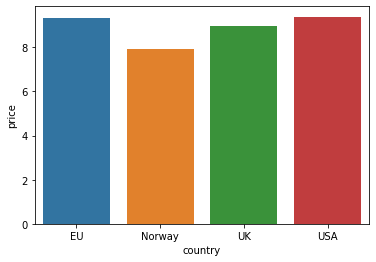

In [72]:
#XML text data를 dict로 저장된 list를 pandas DataFrame으로 변환
columns = ["title", "artist", "country", "company", "price", "year"]
catalog_cd_df = pd.DataFrame(rows, columns = columns)
catalog_cd_df.head(10)

#df.dtypes 로 각 칼럼의 데이터 형태를 확인 - 문자열 객체(string object)
print(catalog_cd_df.dtypes)

# astype()을 이용하여 칼럼 중에서 price는 float64, year는 int32로 변환
import numpy as np
catalog_cd_df = catalog_cd_df.astype({'price': np.float, 'year': int})
print(catalog_cd_df.dtypes)

country_mean = catalog_cd_df.groupby('country').price.mean()
country_mean

country_mean_df = pd.DataFrame(country_mean).reset_index()
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='country', y='price', data=country_mean_df)
plt.show()

Excel 데이터를 읽어와서 pandas DataFrame으로 생성   
pandas의 read_excel() 함수   
sheet_name = 데이터를 읽어올 쉬트이름   
header = 컬럼이름 행번호 , names = 컬럼이름을 직접 입력   
index_col=index로 사용할 열번호 또는 이름   
dtype = 데이터 형 변환   
thousands = ',' #천 단위 구분 기호   
number of rows)=읽어올 행의 개수   

In [77]:
import numpy as np
import pandas as pd
import os

#base_dir = 'D:/admin/Documents'
#excel_file = 'sales_per_region.xlsx'
#excel_dir = os.path.join(base_dir, excel_file)   #파일이 여기 있는 경우 위치를 찾는 코드들은 생략 후 아래에 파일 이름 직접 적으면 된다
 

df_from_excel = pd.read_excel('sales_per_region.xlsx', sheet_name = 'Sheet1', header = 2,  
#names = ['region', 'sales_representative', 'sales_amount'],
dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}, # dictionary type
index_col = 'id', na_values = 'NaN', thousands = ',',nrows = 10, comment = '#')

print(type(df_from_excel))
print(df_from_excel.info())
print(df_from_excel)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 7
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                7 non-null      object 
 1   sales_representative  7 non-null      int64  
 2   sales_amount          7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes
None
     region  sales_representative  sales_amount
id                                             
1     seoul                   510        1500.0
2    inchon                   430        1260.0
3     busan                   320        1090.0
4   guangju                   180         550.0
5     ulsan                   135         380.0
6    sejong                   110         290.0
7    jeunju                    83         235.0


DataFrame 을 Excel로 내보내기    
데이터프레임 값을 CSV 파일로 출력하고 싶으면 to_csv 메서드를 사용   
리눅스나 맥에서는 cat 셸 명령으로 파일의 내용을 확인할 수 있다.     
파일로 출력할 때도 sep 인수로 구분자를 바꿀 수 있다.   
na_rep 인수로 NaN 표시값을 바꿀 수도 있다.   
index, header 인수를 지정하여 인덱스 및 헤더 출력 여부를 지정하는 것도 가능하다.

In [107]:
%%writefile sample1.csv
c1, c2, c3, c4
0.179181, -1.538472, 1.347553, 0.43381,
1.024209, -1.281997, 0.49265,
0.417899, -2.002308, 0.255245, -1.10515

Overwriting sample1.csv


In [102]:
import pandas as pd

#  %% 원래 이게 매직 명령어인데  실행에 오류가 나면 한 개만 써도됨 캐글은 안됨


%%writefile sample1.csv
c1, c2, c3, c4
0.179181, -1.538472, 1.347553, 0.43381,
1.024209, -1.281997, 0.49265,
0.417899, -2.002308, 0.255245, -1.10515


df = pd.read_csv('sample1.csv', na_values=['누락'])
df
df.to_csv('sample3.csv', na_rep='누락')
df.to_csv('sample4.csv', index=False, header=False)

Overwriting sample1.csv


In [108]:
df = pd.read_csv('sample1.csv', na_values=['누락'])
print(df)
df.to_csv('sample3.csv', na_rep='누락')
print('sample3.csv파일 생성됨')
df.to_csv('sample4.csv', index=False, header=False)
print('sample4.csv파일 생성됨')

                c1        c2       c3   c4
0.179181 -1.538472  1.347553  0.43381  NaN
1.024209 -1.281997  0.492650      NaN  NaN
0.417899 -2.002308  0.255245 -1.10515  NaN
sample3.csv파일 생성됨
sample4.csv파일 생성됨


인터넷 상의 CSV 파일 로드
read_csv 명령 사용시 URL을 지정하면 해당 파일을 다운로드하여 읽어 들인다.

In [109]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv")
pd.set_option("display.max_rows", 20) # 앞뒤로 모두 20행만 보여준다.
print( df )

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


Web Scraping   
Ø웹 크롤링   
웹 페이지의 하이퍼링크를 순회하면서 웹 페이지를 다운로드하는 작업    
웹 사이트에서 원하는 정보를 자동으로 수집하는 것
Ø웹 스크레이핑    
다운로드한 웹 페이지에서 필요한 콘텐츠를 추출하는 작업    
웹 페이지를 구성하고 있는 HTML 태그의 콘텐츠나 속성의 값을 읽는 작업    
웹페이지를 읽어오는 과정    
웹사이트에서 읽어온 HTML 문서에서 필요한 데이타를 뽑아내는 과정   
Ø 웹페이지를 읽어오는 모듈     
urllib, urllib2 – 내장 모듈    
Requests - HTTP 라이브러리로 많이 사용되는 모듈



   


HTML - 웹에서 End User는 브라우저 프로그램을 통해서 서비스를 받습니다.   
 html파서(구조 담당) - 태그, 주석, 내용, 속성을 모두 객체로 생성해 메모리에 트리구조로 구성     
 renderer(표현 담당) - 태그명과 id속성, name속성, class속성을 기준으로 html 내용을 위치, 크기, 색깔 등을 적용 (style적용 -css)   
 javascript엔진(동적처리,이벤트, 동작 담당) - dom api 사용해서 hhtml요소를 찾아와 구조 변경, 서버에 전송, 이벤트 처리 결과, style 바꾸는 등등을 처리함      


<!DOCTYPE html> <!--html문서 유형선언-->    
<html>  <!--최상위 element(node)는 1개여야 합니다.-->    
<head>     
<title>Page Title</title>    
<style>    
 p {color: blue ;}    
 #head1 {background: yellow; color: blue ; border: 5px solid red}    
</style>    
</head>    
<body>    

<h1 id = 'head1> This is Heading</h1>   
<p>This is a paragraph.</p>

</body>
</html>



 Crawling을 위해 알아야 할 것들

 HTML    
 Document Object Model    
 Cascading Style Sheet    
 Xpath    
 Javascript    
 HTTP    

In [ ]:
<!DOCTYPE html> <!--html문서 유형선언-->    
<html>  <!--최상위 element(node)는 1개여야 합니다.-->    
<head>     
<title>Page Title</title>    
<style>    
 p {color: blue ;}    
 #head1 {background: yellow; color: blue ; border: 5px solid red}    
</style>    
</head>    
<body>    

<h1 id = 'head1> This is Heading</h1>   
<p>This is a paragraph.</p>

</body>
</html>

위 내용을 메모장에 옮겨 확장자를 html로 설정해 열면 위 내용으로 html이 실행됨    

Xpath란?    

full path, absoulute path   
/dir1/dhild-dir/.../파일명   
c:\dir1\child-dir\   

상대 경로 - 현제 위치를 기준으로 ./sub-dir/sub-dir/.../파일명   
                                 ../.../super-dir/...   
.은 현재경로 ..상위 경로(부모)    

The XML Example Document    
We will use the following XML document in the examples below.

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>

<bookstore>

<book>
  <title lang="en">Harry Potter</title>
  <price>29.99</price>
</book>

<book>
  <title lang="en">Learning XML</title>
  <price>39.95</price>
</book>

</bookstore>


이 Xpath 실습은 자바스크립트로 해야 한다

Web Page   
§ 웹 상의 문서   
§ 텍스트, 그림, 소리, 동영상 등을 표현 가능   
§ 대부분 HTML이라는 언어로 이루어져 있음   



URL(Uniform Resource Locator)   
§ 네트워크 상에서 자원이 어디 있는지를 알려주기 위한 규약   
§ 컴퓨터 네트워크와 검색 메커니즘에서의 자원의 위치를 지정하는 문자열   



URI(Uniform Resource Identity)   
§ 웹 사이트에 요청하고자 하는 대상의 패스정보와 파일명으로 구성   
§ 파일명이 생략되면 디폴트로 index.html 사용    


HTTP(HyperText Transfer Protocol)    
§ 웹상에서 클라이언트와 서버 간에 정보를 주고받을 수 있는 통신 규약(프로토콜)    
§ URL 문자열을 직접 입력하거나, 하이퍼링크 텍스트 또는 이미지를 클릭하여 HTML 문서를 주고받는 데 사용     
§ 디폴트로 80번 포트 사용    
§ 다른 포트 번호를 사용하는 웹 서버에 요청 시 도메인명 뒤에 : 기호와 함께 포트 번호 지정     
§ 시작줄, 헤더(Header), 본문(Body)으로 이루어져 있음     
§ 9개의 메소드가 존재하지만 주로 GET과 POST만 쓰인다.    

GET방식은? 웹 요청을 보낼 때 보낸 데이터가 url의 query string으로 노출이 됨, query string 길이 제한도 있음(데이터를 가져오는 것)    
단순 페이지 요청, 검색어 요청, \<a href="">\ 요청 같은 것들도 get방식으로 요청이 됨    


POST방식은? 웹서버에 데이터를 전송하기 위해 설계됨   
보내는 데이터는 민감한 정보, 길이 제한 없이 전송되어야 하므로   
http프로토콜 body에 포함되어 전송됨 


Ø GET 방식과 POST 방식   
§ 웹상에서 클라이언트와 서버 간에 정보를 주고받을 수 있는 통신 규약 (프로토콜)   
§ URL 문자열을 직접 입력하거나, 하이퍼링크 텍스트 또는 이미지를 클릭하여 HTML 문서를 주고받는 데 사용   
§ 디폴트로 80번 포트 사용   
§ 다른 포트 번호를 사용하는 웹 서버에 요청 시 도메인명 뒤에 : 기호와 함께 포트 번호 지정   
§ 시작줄, 헤더(Header), 본문(Body)으로 이루어져 있음   
§ 9개의 메소드가 존재하지만 주로 GET과 POST만 쓰인다.    

Ø GET 방식   
§ 브라우저에서 직접 요청하려는 페이지의 URL 문자열을 입력하여 요청    
§ 하이퍼링크가 설정된 텍스트나 이미지를 클릭하여 요청   
§ Query 문자열 없는 요청과 Query 문자열을 추가한 요청 모두 가능     
§ Query 문자열이 URL 문자열 뒤에 추가되어 전달   
§ Body 없이 Header만으로 전송된다.   
§ 요청에 길이 제한이 있다   
§ 쿼리 문자열은 key와 value를 가지고 있으며, 각 쿼리는 &로 구분한다.    

Ø POST 방식   
§ Body에 query data가 들어간다.   
§ 링크 / 북마크가 불가능하다   
§ 데이터 길이에 제한이 없다   
§ URL을 가지지 않으므로 주로 중요한 데이터를 다룰 때 사용한다.    
§ Query 문자열이 요청 바디에 따로 담겨서 전달되므로 요청 URL 문자열에서는 볼 수 없음   

Ø HTML(Hypertext markup language)    
§ 웹페이지를 작성하는데 사용되는 마크업 언어   
§ 태그로 HTML 요소(element)를 만든다    
§ 요소 (Elements) : 시작 태그와 종료 태그로 이루어진 모든 명령어    
§ 태그 (Tag) : 요소의 일부, 시작 태그(요소를 시작)와 종료 태그(요소를 끝냄)가 있음.    
§ 속성 (Attributes) : 명령을 구체화 시키는 것으로 요소의 시작태그 안에서 사용됨.    
§ 변수 (Arguments) : 속성과 관련된 값.    

Ø urllib 모듈    
§ Python built-in module    
§ 간편하게 HTTP request를 보낼 수 있음    
§ 로그인 및 세션을 유지하기가 번거로움    
§ URL 작업을 위한 여러 모듈을 모은 패키지     
§ urllib.request - URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈   
§ urllib.error - urllib.request에 의해 발생하는 예외에 대한 예외 클래스를 정의    
URLError, HTTPError, ContentTooShortError    
§ urllib.parse - URL 구문 분석을 위한 모듈    
URL(Uniform Resource Locator) 문자열을 구성 요소(주소 지정 체계, 네트워크 위치, 경로 등)로 분리
URL 구성 요소를 다시 URL 문자열로 결합    
《상대 URL》을 주어진 《기본 URL》에 따라 절대 URL로 변환하는 표준 인터페이스를 정의     
§ urllib.robotparser - robots.txt 파일을 구문 분석하기 위한 RobotFileParser 클래스 제공

Ø urllib.request 모듈    
§ URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈   
§ Urlopen() - 데이터를 파이썬 메모리로 로드    
§ 기본 인증(basic authentication), 쿠키, 리다이렉트, 프락시 등과 같은 일반적인 상황을 처리하기 위한 약간 더 복잡한 인터페이스도 제공   
§ urlretrieved(url, 저장할 파일 경로) – 파일 다운로드 함수

In [113]:
import urllib.request
with urllib.request.urlopen('http://python.org/') as response:
  html = response.read()

print(html)

# URL과 저장 경로 지정하기
url = "http://uta.pw/shodou/img/28/214.png"
savename = "test.png"
# 다운로드
urllib.request.urlretrieve(url, savename)   #urlretrieve 저장할 경로가 따로 없는 건 지금 작업중인 곳에 저장이 된다는 것
print("저장되었습니다...!")

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black"

In [114]:
import shutil
import tempfile
import urllib.request
#URL을 통해 리소스를 가져와서 임시 위치에 저장
with urllib.request.urlopen('http://python.org/') as response:
  with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
    shutil.copyfileobj(response, tmp_file)

with open(tmp_file.name) as html:
  pass

# URL과 저장 경로 지정하기
url = "http://uta.pw/shodou/img/28/214.png"
savename = "test.png"
# 다운로드
mem = urllib.request.urlopen(url).read()
# 파일로 저장하기
with open(savename, mode="wb") as f:
  f.write(mem)
  print("저장되었습니다...!")

저장되었습니다...!


Ø urllib.parse 모듈    
§ data 인자로 Request 객체에 전달합니다.    
§ 인코딩은 urllib.parse 라이브러리의 함수를 사용하여 수행    
§ data 인자를 전달하지 않으면, urllib는 GET 요청을 사용    
§ Get방식 요청 : url?key=value&key=value&… 형식    

In [ ]:
import urllib.request
import urllib.parse

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# 매개변수를 URL 인코딩합니다.    #stnId는 기상 정보를 알고 싶은 지역
values = {'stnId': '108'}
params = urllib.parse.urlencode(values)
# 요청 전용 URL을 생성합니다.
url = API + "?" + params
print("url=", url)
# 다운로드합니다.
data = urllib.request.urlopen(url).read()
text = data.decode("utf-8")
print(text)

Ø urllib.parse 모듈    
§ URL 요청 매개변수를 command line 에서 지정 (sys모듈을 사용하여 command line 매개변수 추출)

In [124]:
import sys
import urllib.request as req
import urllib.parse as parse
# 명령줄 매개변수 추출
if len(sys.argv) <= 1:         
  print("USAGE: download-forecast-argv <Region Number>")
  sys.exit()  #실행 중인 파이썬 코드(어플리케이션)을 종료
regionNumber = sys.argv[1]
print(sys.argv)
print(type(sys.argv))
# 매개변수를 URL 인코딩합니다.
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
values = {
  'stnId': regionNumber
}
params = parse.urlencode(values)
url = API + "?" + params
print("url=", url)
# 다운로드합니다.
data = req.urlopen(url).read()
text = data.decode("utf-8")
print(text)

['/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-305dde36-26c9-46b4-8a91-3fc04d04438c.json']
<class 'list'>
url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=-f



urllib.parse 모듈    
§ Post 요청 - Request 객체에 data 인자 전달    
§ 상대 경로를 전개할 때는 urllib.parse.urljoin(base, path)을 사용합니다    
§ 상대 경로(path 매개변수)가 http://등으로 시작한다면 기본 URL(base 매개변수)을 무시하고, 두번째 매개변수에 지정한 URL을 리턴합니다.

In [126]:
from urllib.parse import urljoin
base = "http://example.com/html/a.html"
print( urljoin(base, "b.html") )   #http://example.com/html/b.html
print( urljoin(base, "sub/c.html") )  #http://example.com/html/sub/c.html
print( urljoin(base, "../index.html") ) #http://example.com/index.html
print( urljoin(base, "../img/hoge.png") )  #http://example.com/index.html
print( urljoin(base, "../css/hoge.css") )  #http://example.com/css/hoge.css
print( urljoin(base, "/hoge.html") )    #http://example.com/hoge.html
print( urljoin(base, "http://otherExample.com/wiki") )   #http://otherExample.com/wiki
print( urljoin(base, "//anotherExample.org/test") )   #http://anotherExample.org/test

http://example.com/html/b.html
http://example.com/html/sub/c.html
http://example.com/index.html
http://example.com/img/hoge.png
http://example.com/css/hoge.css
http://example.com/hoge.html
http://otherExample.com/wiki
http://anotherExample.org/test
